# 実践ロボット制御

## 平面二自由度
### 順運動学
関節の変位から手先の位置を求める
***
$
P(t)=\begin{bmatrix}p_{x}(t) \\p_{y}(t) \end{bmatrix}=\begin{bmatrix}l_{1}C_{1}+l_{2}C_{12}\\l_{1}S_{1}+l_{2}S_{12} \end{bmatrix}
$
***
### 逆運動学
手先の位置が与えられたときに、それを実現するための関節変位を求める
***
順運動学の式の一行目の式と二行目の式の二乗の和をとって

$
\begin{eqnarray*}p_{x}(t)^2+p_{y}(t)^2&=&l_{1}^2+l_{2}^2+2l_{1}l_{2}(C_{1}C_{12}+S_{1}S_{12})
\\\\\mbox{加法定理を使って}\\&=&l_{1}^2+l_{2}^2+2l_{1}l_{2}C_{2}
\\\\C_{2}&=&\frac{p_{x}(t)^2+p_{y}(t)^2-l_{1}^2-l_{2}^2}{2l_{1}l_{2}}\end{eqnarray*}
$

***

[[5.]
 [0.]]
2.5000000000000004 5.0 4.330127018922193 0.0


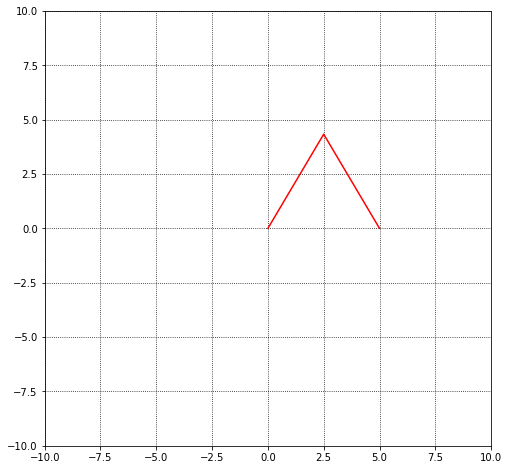

In [23]:
#平面二自由度
import numpy as np
import math
import matplotlib.pyplot as plt

l1 = 5     # 第一関節の長さ
l2 = 5     # 第二関節の長さ
d1 = 60    # 第一関節の角度
d2 = -120  # 第二関節の角度

#順運動学
p = np.matrix([[l1*math.cos(math.radians(d1)) + l2 *
              (math.cos(math.radians(d1)) * math.cos(math.radians(d2)) - math.sin(math.radians(d1)) * math.sin(math.radians(d2)))],
               [l1*math.sin(math.radians(d1)) + l2 *
            (math.sin(math.radians(d1)) * math.cos(math.radians(d2)) + math.cos(math.radians(d1)) * math.sin(math.radians(d2)))]])

print(p)

x1 = l1 * math.cos(math.radians(d1))
y1 = l1 * math.sin(math.radians(d1))
x2 = p[0, 0]
y2 = p[1, 0]

print(x1, x2, y1, y2)

x = [0, x1, x2]
y = [0, y1, y2]


plt.figure(figsize=(8, 8))
plt.plot(x, y, color="red")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(which='major',color='black',linestyle=':')

plt.show()

-59.99999999999999 120.00000000000001


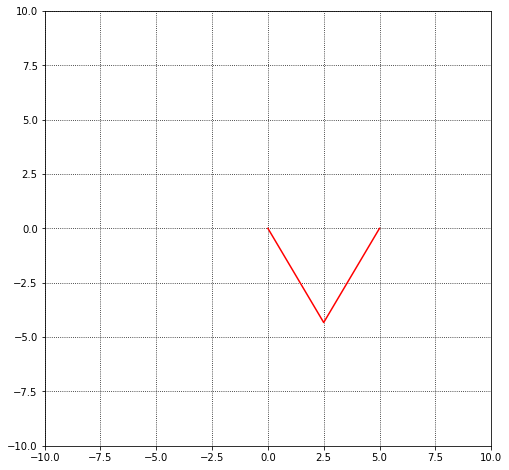

In [62]:
#逆運動学
import numpy as np
import math
import matplotlib.pyplot as plt
 
px = 5  #手先座標
py = 0  #手先座標
l1 = 5  #第一関節の長さ
l2 = 5  #第二関節の長さ

l3 = math.sqrt((px*px) + (py*py))
d2 = math.acos(((l3 * l3) - (l1 * l1) -(l2 * l2))/(2 * l1 * l2))

               
q = np.matrix([[l1 + l2 * math.cos(d2), l2 * math.sin(d2)],
              [-l2 * math.sin(d2), l1+ l2 * math.cos(d2)]])

p = np.matrix([[px], [py]])

r = np.dot(q, p)


c1 = r[0, 0] / (l1 ** 2 + l2 ** 2 + 2 * l1 * l2 * math.cos(d2))
s1 = r[1, 0] / (l1 ** 2 + l2 ** 2 + 2 * l1 * l2 * math.cos(d2))

d1 = math.atan2(s1, c1)

print(math.degrees(d1),math.degrees(d2))

x1 = l1 * math.cos(d1)
y1 = l1 * math.sin(d1)

x2 = x1 + l2 * math.cos((d1 + d2))
y2 = y1 + l2 * math.sin((d1 + d2))

x = [0, x1, x2]
y = [0, y1, y2]




plt.figure(figsize=(8, 8))
plt.plot(x, y, color="red")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(which='major',color='black',linestyle=':')

plt.show()

In [43]:
#垂直型三自由度
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

px = 6
py = 6
pz = 6

l2 = 7
l3 = 7

l4 = math.sqrt((px*px)+(py*py)+(pz*pz))
d3 = math.acos((((l4*l4)-(l2*l2)-(l3*l3))/(2*l2*l3)))

d1 = math.atan2(py,px)

a = math.sqrt((px*px)+(py*py))
d2 = math.atan2((-l3*math.sin(d3)*a)+((l2+l3*math.cos(d3))*pz),((l2+l3*math.cos(d3))*a)+(l3*math.sin(d3)*pz))


# print(math.degrees(d1),d2,d3)
# x1 = l1 * math.cos(d2)
# y1 = l1 * math.sin(d2)

# x2 = x1 + l2 * math.cos((d2 + d3))
# y2 = y1 + l2 * math.sin((d2 + d3))

# z1 = math.cos(d1)*x1
# z2 = math.sin(d1)*x1
# z3 = math.cos(d1)*x2
# z4 = math.sin(d1)*x2

# x= [0,x1,x2]
# y= [0,y1,y2]

# plt.figure(figsize=(8, 8))
# plt.plot(x, y, color="red")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
# plt.grid(which='major',color='black',linestyle=':')

# plt.show()

# x = [0, z1, z3]
# y = [0, y1, y2]
# z = [0, z2, z4]
# print(x,y,z)

# fig = plt.figure()
# ax = Axes3D(fig)

# ax.plot(x,y,z,color="red")
# plt.show()


[[5.]
 [0.]]


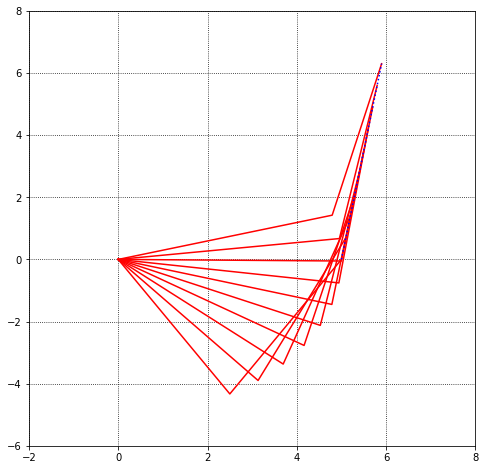

In [121]:
#作業座標系での軌道生成

import numpy as np
import math
import matplotlib.pyplot as plt

l1 = 5     # 第一関節の長さ
l2 = 5     # 第二関節の長さ
d1 = 60    # 第一関節の角度
d2 = -120  # 第二関節の角度

p = np.matrix([[l1*math.cos(math.radians(d1)) + l2 *
              (math.cos(math.radians(d1)) * math.cos(math.radians(d2)) - math.sin(math.radians(d1)) * math.sin(math.radians(d2)))],
               [l1*math.sin(math.radians(d1)) + l2 *
            (math.sin(math.radians(d1)) * math.cos(math.radians(d2)) + math.cos(math.radians(d1)) * math.sin(math.radians(d2)))]])

print(p)

x1 = l1 * math.cos(math.radians(d1))
y1 = l1 * math.sin(math.radians(d1))
px = p[0, 0]
py = p[1, 0]

pfx = 6
pfy = 7

t = np.arange(0,10,1)
u = 10

p0 = np.matrix([[px],[py]])
pf = np.matrix([[pfx],[pfy]])

pdx = (p0[0,0]*(1-(t/u)))+pf[0,0]*(t/u)
pdy = (p0[1,0]*(1-(t/u)))+pf[1,0]*(t/u)


l3 = np.sqrt((pdx*pdx) + (pdy*pdy))
d2 = np.arccos(((l3 * l3) - (l1 * l1) -(l2 * l2))/(2 * l1 * l2))

d1 = np.arctan2((-l2)*np.sin(d2)*pdx+(l1+l2*np.cos(d2))*pdy, (l1+l2*np.cos(d2))*pdx+l2*np.sin(d2)*pdy)

x1 = l1 * np.cos(d1)
y1 = l1 * np.sin(d1)

x2 = x1 + l2 * np.cos((d1 + d2))
y2 = y1 + l2 * np.sin((d1 + d2))

a = []
for i in range(10):
    a.append(0)
x = [a, x1, x2]
y = [a, y1, y2]

plt.figure(figsize=(8, 8))
plt.plot( x, y, color="red")
plt.plot(x2,y2,color= "blue",linestyle="dotted")
plt.xlim(-2, 8)
plt.ylim(-6, 8)
plt.grid(which='major',color='black',linestyle=':')
plt.show()

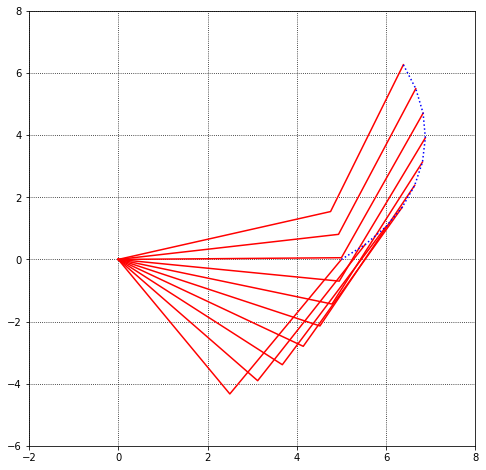

In [122]:
#関節空間での軌道生成

import numpy as np
import math
import matplotlib.pyplot as plt

l1 = 5     # 第一関節の長さ
l2 = 5     # 第二関節の長さ
d10 = -60    # 第一関節の角度
d20 = 120  # 第二関節の角度

p = np.matrix([[l1*math.cos(math.radians(d10)) + l2 *
              (math.cos(math.radians(d10)) * math.cos(math.radians(d20)) - math.sin(math.radians(d10)) * math.sin(math.radians(d20)))],
               [l1*math.sin(math.radians(d10)) + l2 *
            (math.sin(math.radians(d10)) * math.cos(math.radians(d20)) + math.cos(math.radians(d10)) * math.sin(math.radians(d20)))]])



x1 = l1 * math.cos(math.radians(d10))
y1 = l1 * math.sin(math.radians(d10))
px = p[0, 0]
py = p[1, 0]

pfx = 6
pfy = 7

l3 = np.sqrt((pfx*pfx) + (pfy*pfy))
d2 = np.arccos(((l3 * l3) - (l1 * l1) -(l2 * l2))/(2 * l1 * l2))

d1 = np.arctan2((-l2)*np.sin(d2)*pfx+(l1+l2*np.cos(d2))*pfy, (l1+l2*np.cos(d2))*pfx+l2*np.sin(d2)*pfy)

d3 = d2 - math.radians(d20)
d4 = d1 - math.radians(d10)

t1 = np.arange(math.radians(d10),d1,d4/10)
t2 = np.arange(math.radians(d20),d2,d3/10)

x1 = l1 * np.cos(t1)
y1 = l1 * np.sin(t1)

x2 = x1 + l2 * np.cos((t1 + t2))
y2 = y1 + l2 * np.sin((t1 + t2))

a = []
for i in range(10):
    a.append(0)
x = [a, x1, x2]
y = [a, y1, y2]

plt.figure(figsize=(8, 8))
plt.plot( x, y, color="red")
plt.plot(x2,y2,color="blue",linestyle="dotted")
plt.xlim(-2, 8)
plt.ylim(-6, 8)
plt.grid(which='major',color='black',linestyle=':')
plt.show()